In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\I068117\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\I068117\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\I068117\AppData\Local\Temp\ipykernel_1680\2232663326.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Multiple Linear Regression on the Auto data-set

In [2]:
df= pd.read_excel('C:/Users/I068117/UT_Machine Learning/Regression/Auto.xlsx')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Cleaning: Checking for null values & datatypes. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


Interpretation: We observe that column horsepower is an object. We look at the non-numeric rows and delete them from the data-set to clean the data

In [3]:
df= df.drop(df[pd.to_numeric(df['horsepower'],errors='coerce').isnull()].index, axis=0)
df['horsepower']=pd.to_numeric(df['horsepower'])

In [4]:
df.drop('name',axis=1,inplace=True)

### Data Visualization:  scatterplot matrix that includes all of the variables in the data set.

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

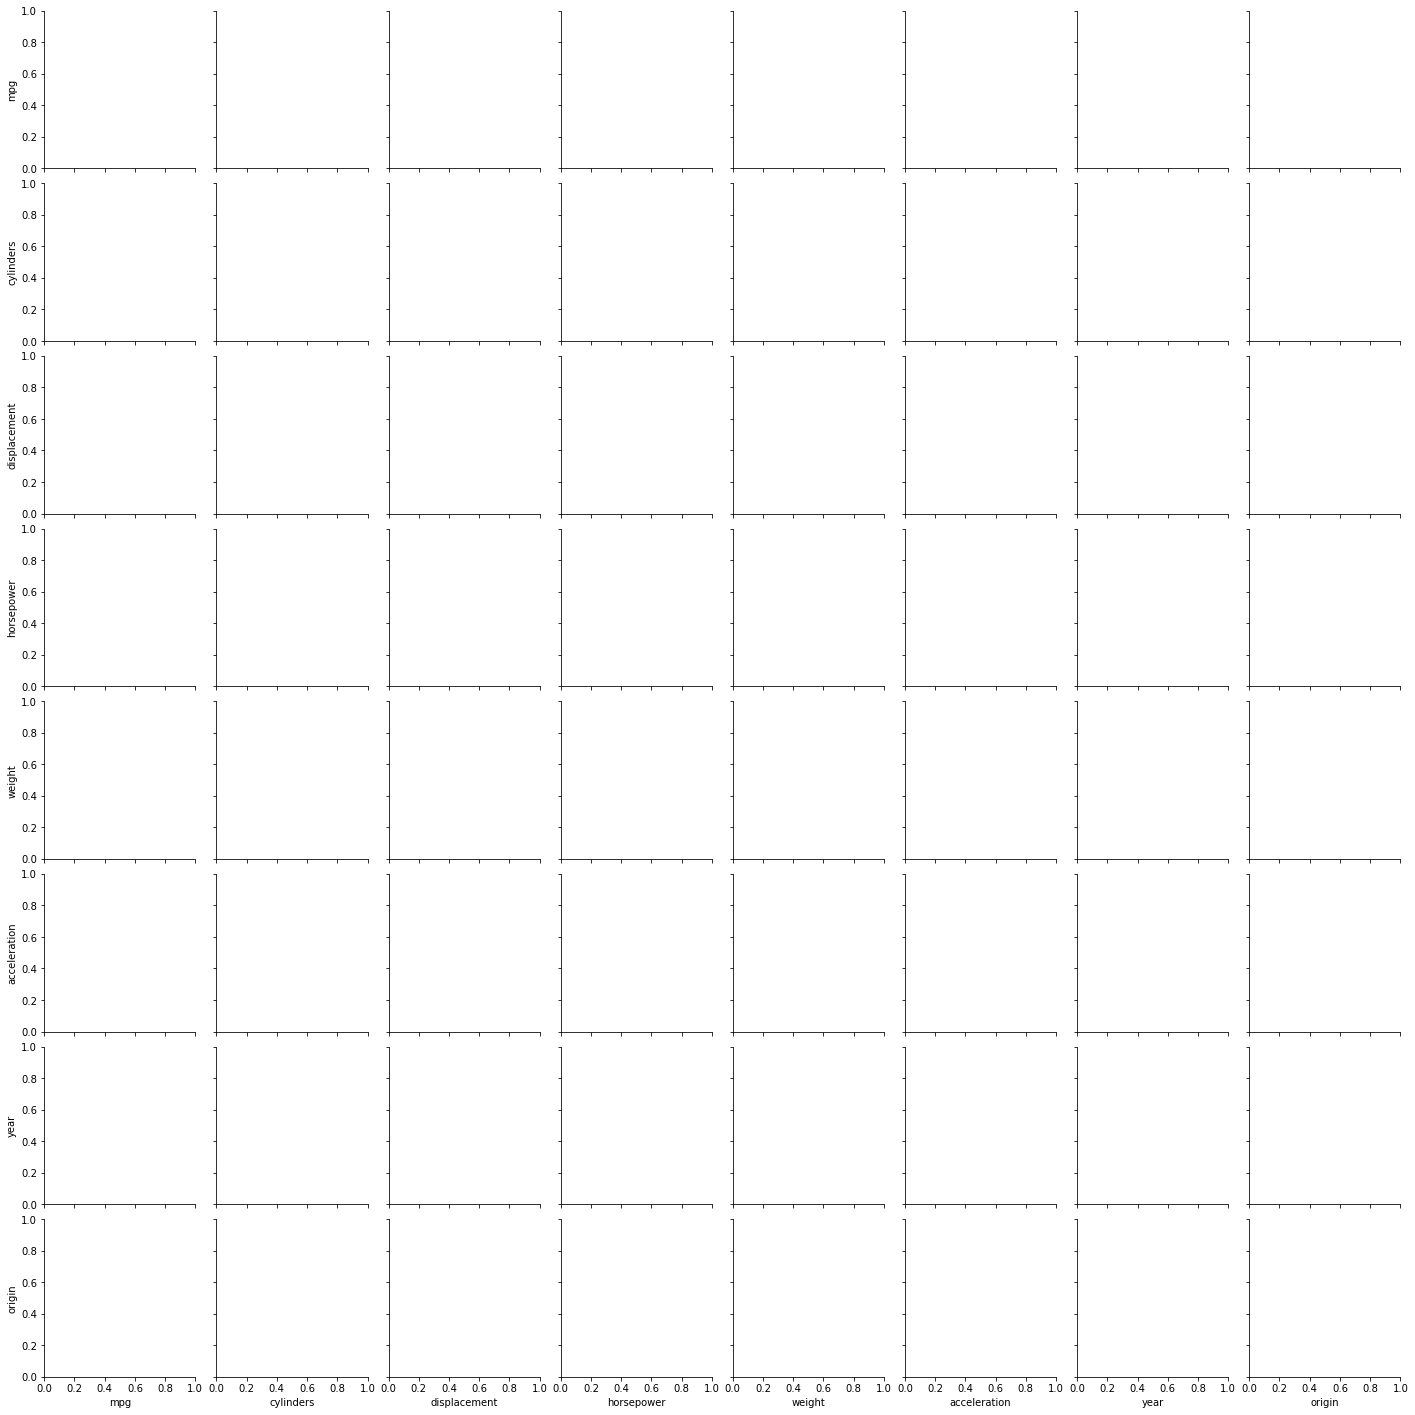

In [5]:
sns.pairplot(df)

Correlation between all numeric columns in the dataset

In [9]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
sns.heatmap()

Interpretation: We see there is some linear relationship between mpg & other numeric variables. Hence, we try to fit in a linear model. However, we see there is also a correlation among different columns like weight & displacement. Going by the principle of Correlation is not causation, we need to control for co-linearity

In [10]:
!pip install yellowbrick

### Fitting a MLR model to predict mpg on all numeric variables 

In [70]:
# Creating X with all numeric columns and Y as mpg column
X= df.drop(['displacement','weight', 'mpg','horsepower','name','acceleration'],axis=1)
y= df['mpg']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X1= pd.DataFrame(scaler.transform(X))

In [58]:
X1

,0,1,2,3
0,1.495535,-1.294604,-1.626699,-0.716507
1,1.495535,-1.476652,-1.626699,-0.716507
2,1.495535,-1.658700,-1.626699,-0.716507
3,1.495535,-1.294604,-1.626699,-0.716507
4,1.495535,-1.840747,-1.626699,-0.716507
...,...,...,...,...
392,-0.858191,0.016141,1.629433,-0.716507
393,-0.858191,3.293004,1.629433,0.531095
394,-0.858191,-1.440242,1.629433,-0.716507
395,-0.858191,1.108429,1.629433,-0.716507


In [32]:
X1.drop([1,3], axis=1, inplace=True)

In [13]:
from yellowbrick.target import FeatureCorrelation

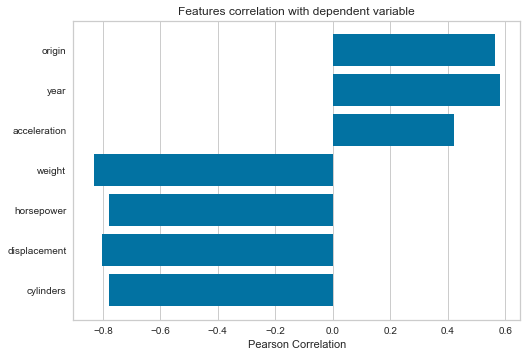

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
visualizer = FeatureCorrelation(labels= X.columns)
visualizer.fit(X,y)
visualizer.poof()

In [15]:
# Feature selection usinf variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif=pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]

In [60]:
vif['features'] = X1.columns
vif.round(2)

,VIF Factor,features
0,1.99,0
1,1.38,1
2,1.16,2
3,1.49,3


In [27]:
vif['features'] = X1.columns
vif.round(2)

,VIF Factor,features
0,10.74,0
1,21.84,1
2,9.94,2
3,10.83,3
4,2.63,4
5,1.24,5
6,1.77,6


vif >5 for a scaled data suggests high colinearity/highly corelated, you should consider dropping those features..drop displacement & weight.. now calculate vif factor again

In [71]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)
lm.coef_

array([-2.68049809,  0.76962967,  1.37440536])

In [15]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     171.5
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.96e-92
Time:                        16:49:56   Log-Likelihood:                -689.32
No. Observations:                 262   AIC:                             1395.
Df Residuals:                     254   BIC:                             1423.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.6712      6.108     -2.566   

Interpretation: 
1. Our baseline for mpg is the constant -15.6712
2. With Pvalues <5%, we see weight, displacement**, year & origin are statistically significant. Since weight & displacement are highly corelated, if we control for weight, displacement is border-line statsitically significant. We can create a model keeping only weight, year & origin as feature selection based on statistical significance.
3. R2 is 83%, which means our model is able to explain 83% of the variance. 

### Evaluating the linear fit based on the residual plot. 

For linear model, we say our error follows a normal distribution, which means mean(error)=0 and there is no correlation between the error & the fitted values. If we plot the error & fitted Y predicted values, there should not be a pattern or association. 

In [65]:
Y_test_pred=lm.predict(X_test)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

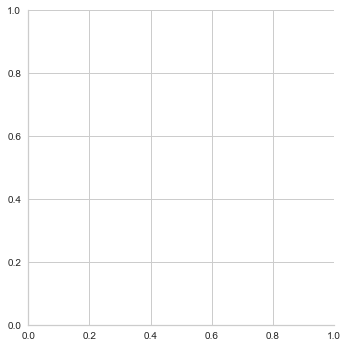

In [66]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

Interpretation: our residual error follows a normal distribution with 0 mean

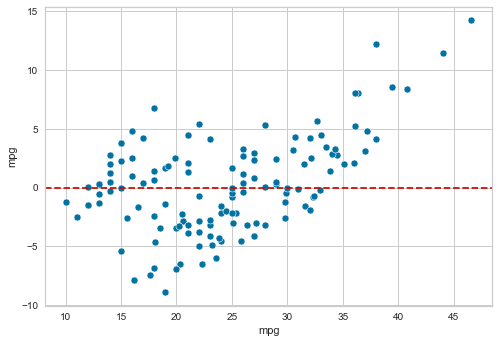

In [67]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: We see a curved pattern and there is some correlation between Y_test & residual error. Hence Linear model may not be a good fit. 

### Calculating the RMSE of the model

In [68]:
#Evaluating the accuracy of our model
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

4.064076531404458

### MLR using Ridge regression to reduce variance in the data by adding a penalty term.

In [91]:
from sklearn.linear_model import Ridge
ridge_model= Ridge(alpha=20)
rd = ridge_model.fit(X_train,y_train)

In [92]:
Y_test_pred=rd.predict(X_test)
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.223976163979061

In [90]:
from sklearn.linear_model import RidgeCV
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 20.0), scoring='neg_mean_absolute_error')
rd_cv =ridge_cv_model.fit(X_train,y_train)
rd_cv.alpha_

20.0

### MLR using Lasso regression to reduce variance in the data by adding a penalty term.

In [108]:
from sklearn.linear_model import LassoCV
Lasso_cv_model=LassoCV(eps=0.0001, n_alphas=100,cv=5)
la_cv =Lasso_cv_model.fit(X_train,y_train)
la_cv.alpha_

0.5710081562845989

In [109]:
Y_test_pred=la_cv.predict(X_test)
from sklearn.metrics import mean_squared_error
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.2846202229079693

In [105]:
la_cv.coef_

array([-0.        , -0.        , -0.02456037, -0.0060374 ,  0.        ,
        0.6473552 ,  0.14515546])

Not much improvement in RMSE Lasso but the features are reduced for the same RMSE

### Improving our model: Trying a new model based on feature selection 

In [21]:
# Creating X with statistically significant features based on our previous model - weight, year & origin and Y as mpg column
X= df[['weight','year','origin']]
y= df['mpg']

In [22]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)
lm.coef_

array([-0.00607235,  0.76637659,  1.46417237])

In [23]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     388.9
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.14e-95
Time:                        16:51:32   Log-Likelihood:                -694.08
No. Observations:                 262   AIC:                             1396.
Df Residuals:                     258   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8257      5.277     -3.567      0.0

In [24]:
Y_test_pred=lm.predict(X_test)

In [25]:
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.1985691330474975

Residual plot

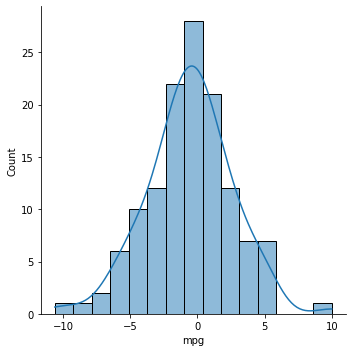

In [130]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

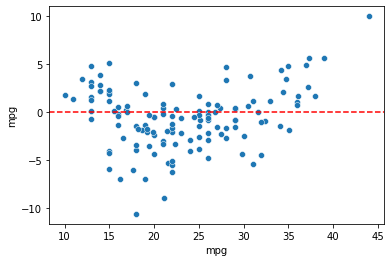

In [131]:
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation:
1. We are able to explain 82% of the variance in our model with just 3 features. We have reduced the complixity of our model using feature selection without affecting R2. Our RMSE is slightly reduced. So, this model is simpler than previous model with same RMSE
    

### Let's try to different interation terms/ polynomial model  to further reduce the RMSE

In [71]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)
lm.coef_
#R2 score
lm.score(X_train,y_train)

0.9072770756177186

In [73]:
from sklearn.metrics import mean_squared_error
Y_test_pred=lm.predict(X_test)
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

2.9353137202643533

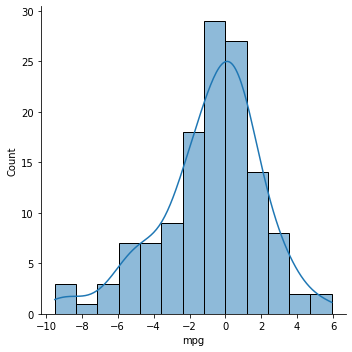

In [111]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

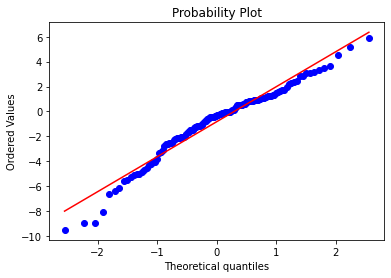

In [114]:
fig = plt.figure()
res = stats.probplot(Y_test_residual, plot=plt)

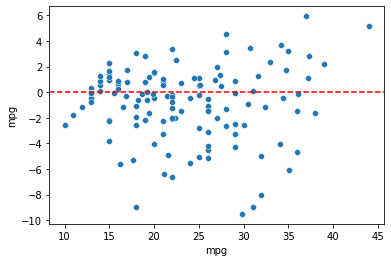

In [112]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: RMSE is reduced to 2.9. This model satisfies the Linear model assumption. Residual mean is 0 & there is no pattern obsered

### Exploring Linear regression with different transformation for weight

In [159]:
X= np.log(df[['weight','year','origin']])
y= df['mpg']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     463.6
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          1.42e-103
Time:                        17:26:00   Log-Likelihood:                -674.94
No. Observations:                 262   AIC:                             1358.
Df Residuals:                     258   BIC:                             1372.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.9979     22.346     -3.714      0.0

In [161]:
Y_test_pred=lm.predict(X_test)
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.060571168606525

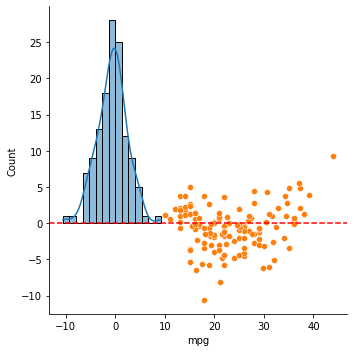

In [162]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')